In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import pandas as pd
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import SMOTE

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
movie_reviews = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/new_data.csv")

movie_reviews.isnull().values.any()

movie_reviews.shape

(22788, 2)

In [ ]:
movie_reviews.head(20)

,comments,sentiment
0,~~মা শিক্ষিত না হলেও ~~মায়ের শিক্ষা কখনো ছোট...,Positive
1,৭বছর পর সাকিব খানের কোন ছবি দেখলাম।। এক কথায় অ...,Positive
2,আমার দেখা ইমনের সেরা অভিনয় এই মুভিতে আর শাকিব...,Positive
3,আমার জিবনে প্রথম মুভি যে হলে গিয়ে দেখলাম ওনেক ...,Positive
4,সেই ২০১৯ থেকে অপেক্ষায় ছিলাম কবে ইউটিউবে আসবে ...,Positive
5,শাকিব খানের এই মুভিটি অনেক সুন্দর হয়েছে,Positive
6,বাংলা মুভির পাশে থাকার জন্য সবাইকে অসংখ্য ধন্য...,Positive
7,"সময়ের সেরা ছবি পাসওয়ার্ড,সবাই বেশি বেশি দেখুন ...",Positive
8,বাংলাদেশের কিছুর অভাব থাকলেও পাগলের অভাব নেই,Negative
9,শাকিব খান ছাড়া কোনো কথা হবে না ইনশাআল্লাহ,Positive


In [ ]:

movie_reviews["comments"][18]


'শাকিব খান,, বুবলি,,  অমিত হাসান,, শিবা শানু,, ডন ,,, বিশেষ করে ইমনের  এবং ট্যালেন্টেড মিশা সওদাগর সবাই মিলে দারুন একটা মুভি উপহার দিয়েছেন যদিও কাহিনী অনেক কিছু সমস্যা ছিলো তারপরেও অসম্ভব সুন্দর হইছে মুভিটি,,, এগিয়ে যাক শাকিব খানের পাশাপশি সবার বাংলাদেশের ভালো মুভি গুলো।।।।'

In [ ]:
movie_reviews = movie_reviews.dropna(subset=['sentiment'])

In [ ]:
movie_reviews['sentiment'] = movie_reviews['sentiment'].str.strip()

In [ ]:
movie_reviews['sentiment'] = movie_reviews['sentiment'].str.lower()

In [ ]:
print(movie_reviews['sentiment'].unique())

['positive' 'negative']


In [ ]:
print(movie_reviews['sentiment'].dtype)

object


In [ ]:
movie_reviews['sentiment'] = movie_reviews['sentiment'].astype('category')

In [ ]:
print(movie_reviews['sentiment'].dtype)

category


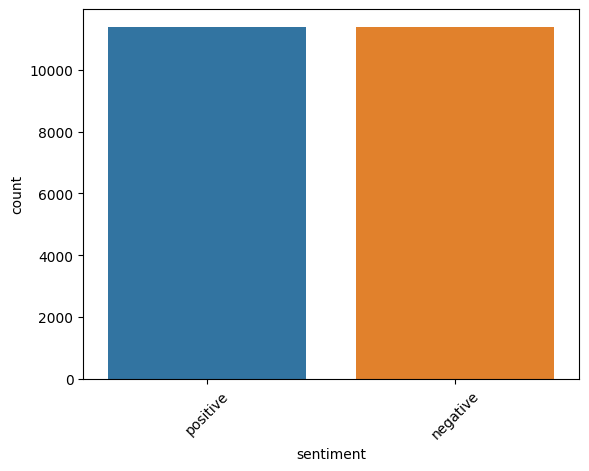

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

order = ["positive", "negative"]
sns.countplot(x='sentiment', data=movie_reviews, order=order)
plt.xlabel('sentiment')
plt.xticks(rotation=45)
plt.show()

In [ ]:
!pip install bangla-stemmer
from bangla_stemmer.stemmer.stemmer import BanglaStemmer
nltk.download('punkt')
!pip install bangla-stemmer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from imblearn.over_sampling import SMOTE
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import pandas as pd

# Replace the file path with the correct path to your 'stopwords.txt' file
file_path = r'/content/drive/MyDrive/Colab Notebooks/stopwords.txt'
data1 = pd.read_table(file_path)

In [ ]:
print(data1)
stop = data1['words'].tolist()


        words
0        অতএব
1         অথচ
2        অথবা
3    অনুযায়ী
4        অনেক
..        ...
393     হাজার
394    হিসাবে
395      হৈলে
396       হোক
397        হয়

[398 rows x 1 columns]


In [ ]:
# Define the preprocess_text function
def preprocess_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()

        # Remove special characters and numbers using regex
        text = re.sub(r"[^A-Za-zঀ-৾]+", ' ', text)

        # Apply stemming using BanglaStemmer
        text = stem_text(text)

        # Tokenize the text and remove custom stopwords
        tokens = nltk.word_tokenize(text)
        tokens = [token for token in tokens if token not in stop]

        # Lemmatize the tokens
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # Join tokens back to text
        text = ' '.join(tokens)

        return text
    else:
        return ""  # Return an empty string for non-string inputs

# Function for text stemming
def stem_text(x):
    stemmer = BanglaStemmer()
    words = x.split(' ')
    stm = [stemmer.stem(w) for w in words]
    words = ' '.join(stm)
    return words

In [ ]:
X = movie_reviews['comments'].apply(preprocess_text).tolist()

Streaming output truncated to the last 5000 lines.
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
appli

In [ ]:
X[18]

'শাকিব খান বুব অমিত হাসান শিবা শানু ডন ইমন ট্যালেন্টেড মিশা সওদাগর সবা মিলে দারুন এক মুভি উপহ কাহিনী সমস্যা ছিলো তারপরে অসম্ভব সুন্দর হই মুভি এগিয়ে যাক শাকিব খান পাশাপশি বাংলাদেশের ভালো মুভি গুলো'

In [ ]:
y = movie_reviews['sentiment']
y = np.array([ 1 if label == 'positive' else 0 for label in movie_reviews['sentiment']])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from imblearn.over_sampling import SMOTE
from bangla_stemmer.stemmer.stemmer import BanglaStemmer

In [ ]:
# Preprocess X_train and X_test with stopwords removal
X_train_preprocessed = [preprocess_text(comment) for comment in X_train]
X_test_preprocessed = [preprocess_text(comment) for comment in X_test]

# Create and fit the tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token='<UNK>')
tokenizer.fit_on_texts(X_train_preprocessed)

# Get the vocab_size from the tokenizer
vocab_size = len(tokenizer.word_index) + 1

# Convert text data to sequences and pad them
X_train_sequences = tokenizer.texts_to_sequences(X_train_preprocessed)
X_test_sequences = tokenizer.texts_to_sequences(X_test_preprocessed)

maxlen = 1000
X_train_padded = pad_sequences(X_train_sequences, padding='post', maxlen=maxlen)
X_test_padded = pad_sequences(X_test_sequences, padding='post', maxlen=maxlen)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_padded, y_train = smote.fit_resample(X_train_padded, y_train)

Streaming output truncated to the last 5000 lines.
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..


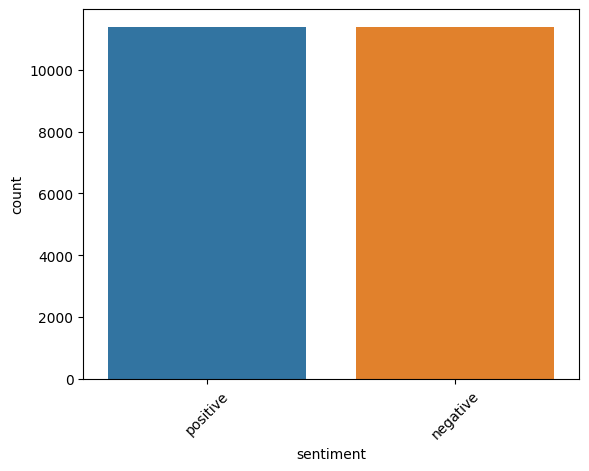

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

order = ["positive", "negative"]
sns.countplot(x='sentiment', data=movie_reviews, order=order)
plt.xlabel('sentiment')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

y_train_one_hot = to_categorical(y_train, num_classes=2)

# Model architecture
embedding_dim = 50
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())

model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model training
epochs = 500
batch_size = 32
model.fit(X_train_padded, to_categorical(y_train, num_classes=2), epochs=epochs, batch_size=batch_size, validation_split=0.3)

# Model evaluation
y_test_one_hot = to_categorical(y_test, num_classes=2)
loss, accuracy = model.evaluate(X_test_padded, y_test_one_hot)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/500
399/399 [==============================] - 20s 47ms/step - loss: 0.4154 - accuracy: 0.7976 - val_loss: 0.2619 - val_accuracy: 0.9015
Epoch 2/500
399/399 [==============================] - 6s 14ms/step - loss: 0.2145 - accuracy: 0.9203 - val_loss: 0.2560 - val_accuracy: 0.9029
Epoch 3/500
399/399 [==============================] - 4s 11ms/step - loss: 0.1501 - accuracy: 0.9484 - val_loss: 0.2649 - val_accuracy: 0.9006
Epoch 4/500
399/399 [==============================] - 5s 12ms/step - loss: 0.1151 - accuracy: 0.9600 - val_loss: 0.2996 - val_accuracy: 0.9007
Epoch 5/500
399/399 [==============================] - 4s 11ms/step - loss: 0.0923 - accuracy: 0.9684 - val_loss: 0.3582 - val_accuracy: 0.8920
Epoch 6/500
399/399 [==============================] - 4s 9ms/step - loss: 0.0748 - accuracy: 0.9727 - val_loss: 0.3528 - val_accuracy: 0.8984
Epoch 7/500
399/399 [==============================] - 4s 9ms/step - loss: 0.0658 - accuracy: 0.9771 - val_loss: 0.3930 - val_accuracy: 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Generate predictions
y_pred = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_classes))



143/143 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2277
           1       0.87      0.89      0.88      2281

    accuracy                           0.88      4558
   macro avg       0.88      0.88      0.88      4558
weighted avg       0.88      0.88      0.88      4558



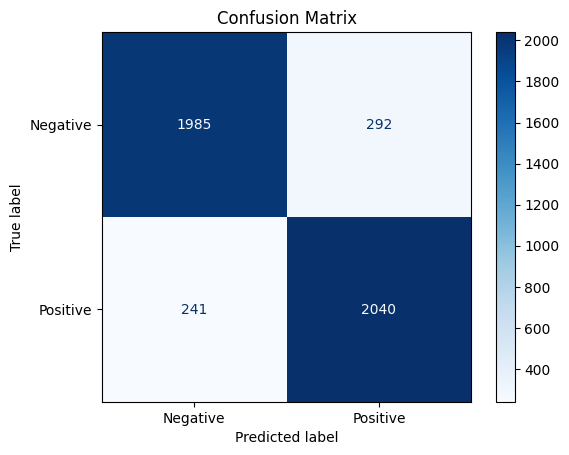

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Compute the confusion matrix
cm = confusion_matrix(y_test, np.round(y_pred[:, 1]))  # Use np.round for thresholding probabilities

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

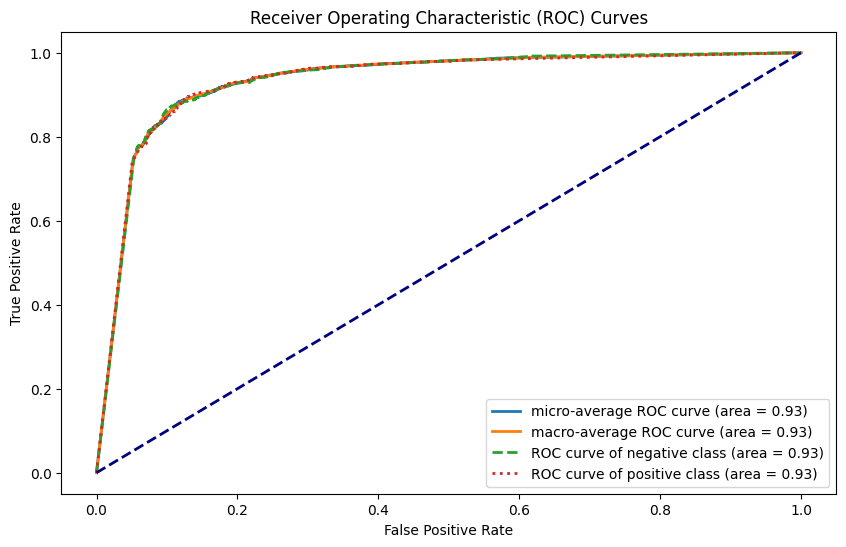

In [ ]:
# Assuming 2 classes, adjust accordingly
negative_class_index = 0  # Index of the negative class
positive_class_index = 1  # Index of the positive class

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(2):
    if i == negative_class_index:
        fpr['negative'], tpr['negative'], _ = roc_curve(y_test_one_hot[:, i], y_pred[:, i])
        roc_auc['negative'] = auc(fpr['negative'], tpr['negative'])
    elif i == positive_class_index:
        fpr['positive'], tpr['positive'], _ = roc_curve(y_test_one_hot[:, i], y_pred[:, i])
        roc_auc['positive'] = auc(fpr['positive'], tpr['positive'])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_one_hot.ravel(), y_pred.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Compute macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr['negative'], fpr['positive']]))
mean_tpr_negative = np.interp(all_fpr, fpr['negative'], tpr['negative'])
mean_tpr_positive = np.interp(all_fpr, fpr['positive'], tpr['positive'])
mean_tpr = (mean_tpr_negative + mean_tpr_positive) / 2
roc_auc_macro = auc(all_fpr, mean_tpr)
# Plot ROC curves
plt.figure(figsize=(10, 6))

# Plot micro-average ROC curve with a solid line
plt.plot(fpr_micro, tpr_micro, label='micro-average ROC curve (area = {:.2f})'.format(roc_auc_micro), linestyle='-', linewidth=2)

# Plot macro-average ROC curve with a solid line
plt.plot(all_fpr, mean_tpr, label='macro-average ROC curve (area = {:.2f})'.format(roc_auc_macro), linestyle='-', linewidth=2)

# Plot individual class ROC curves with different line styles
plt.plot(fpr['negative'], tpr['negative'], label='ROC curve of negative class (area = {:.2f})'.format(roc_auc['negative']), linestyle='--', linewidth=2)
plt.plot(fpr['positive'], tpr['positive'], label='ROC curve of positive class (area = {:.2f})'.format(roc_auc['positive']), linestyle=':', linewidth=2)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


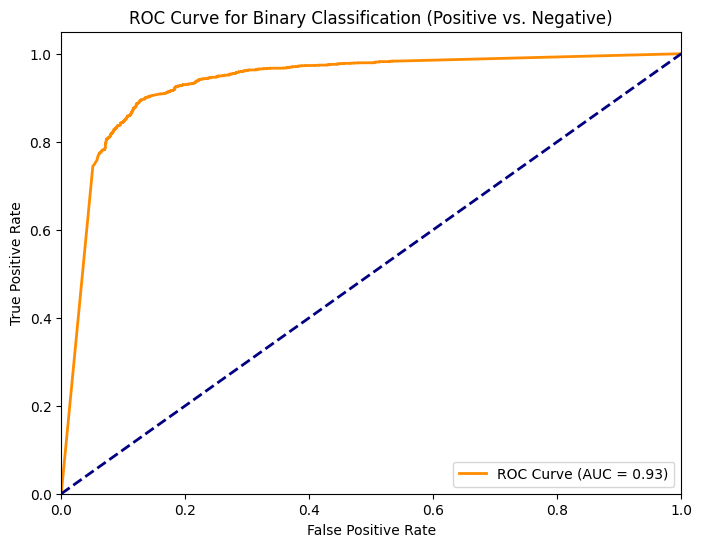

In [ ]:
# Compute ROC curve and AUC for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred[:, 1])  # Use y_pred[:, 1] for positive class
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification (Positive vs. Negative)')
plt.legend(loc="lower right")
plt.show()


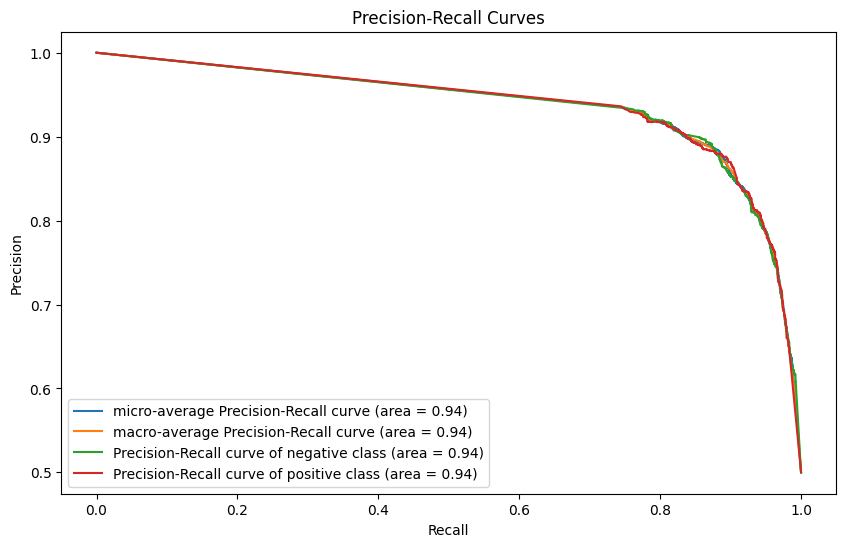

In [ ]:
# Assuming 2 classes, adjust accordingly
negative_class_index = 0  # Index of the negative class
positive_class_index = 1  # Index of the positive class

# Calculate precision-recall curve for each class
precision = dict()
recall = dict()
pr_auc = dict()

for i in range(2):
    if i == negative_class_index:
        precision['negative'], recall['negative'], _ = precision_recall_curve(y_test_one_hot[:, i], y_pred[:, i])
        pr_auc['negative'] = auc(recall['negative'], precision['negative'])
    elif i == positive_class_index:
        precision['positive'], recall['positive'], _ = precision_recall_curve(y_test_one_hot[:, i], y_pred[:, i])
        pr_auc['positive'] = auc(recall['positive'], precision['positive'])

# Compute micro-average precision-recall curve and AUC
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_one_hot.ravel(), y_pred.ravel())
pr_auc["micro"] = auc(recall["micro"], precision["micro"])

# Compute macro-average precision-recall curve and AUC
all_recall = np.unique(np.concatenate([recall['negative'], recall['positive']]))
mean_precision_negative = np.interp(all_recall, recall['negative'][::-1], precision['negative'][::-1])
mean_precision_positive = np.interp(all_recall, recall['positive'][::-1], precision['positive'][::-1])
mean_precision = (mean_precision_negative + mean_precision_positive) / 2
precision["macro"] = mean_precision
recall["macro"] = all_recall
pr_auc["macro"] = auc(recall["macro"], precision["macro"])

# Plot Precision-Recall curves
plt.figure(figsize=(10, 6))

# Plot micro-average Precision-Recall curve
plt.plot(recall["micro"], precision["micro"], label='micro-average Precision-Recall curve (area = {:.2f})'.format(pr_auc["micro"]))

# Plot macro-average Precision-Recall curve
plt.plot(recall["macro"], precision["macro"], label='macro-average Precision-Recall curve (area = {:.2f})'.format(pr_auc["macro"]))

# Plot individual class Precision-Recall curves
plt.plot(recall['negative'], precision['negative'], label='Precision-Recall curve of negative class (area = {:.2f})'.format(pr_auc['negative']))
plt.plot(recall['positive'], precision['positive'], label='Precision-Recall curve of positive class (area = {:.2f})'.format(pr_auc['positive']))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='lower left')
plt.show()


In [ ]:
# Save the model
model.save('CNN_final.h5')
from google.colab import files

files.download('CNN_final.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>